In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
#data link https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29\n",
header_column = ["Status of existing checking account",
                "Duration in month",
                "Credit history",
                "Purpose",
                "Credit amount",
                "Savings account/bondsn",
                "Present employment since",
                "Installment rate in percentage of disposable income",
                "Personal status and sex",
                "Other debtors / guarantors",
                "Present residence since",
                "Property",
                "Age in years",
                "Other installment plans",
                "Housing",
                "Number of existing credits at this bank",
                "Job",
                "Number of people being liable to provide maintenance for",
                "Telephone",
                "foreign worker",
                "actual classification"]
data = pd.read_csv("D:\Frong\Github\software development\SC348810-Software-Development-and-Project-Management-for-Data-Science-and-Artificial-Intelligence\data\german_data.txt", sep = " ", names = header_column)
df = pd.DataFrame(data = data)

#Check data
df.head()

,Status of existing checking account,Duration in month,Credit history,Purpose,Credit amount,Savings account/bondsn,Present employment since,Installment rate in percentage of disposable income,Personal status and sex,Other debtors / guarantors,...,Property,Age in years,Other installment plans,Housing,Number of existing credits at this bank,Job,Number of people being liable to provide maintenance for,Telephone,foreign worker,actual classification
0,A11,6,A34,A43,1169,A65,A75,4,A93,A101,...,A121,67,A143,A152,2,A173,1,A192,A201,1
1,A12,48,A32,A43,5951,A61,A73,2,A92,A101,...,A121,22,A143,A152,1,A173,1,A191,A201,2
2,A14,12,A34,A46,2096,A61,A74,2,A93,A101,...,A121,49,A143,A152,1,A172,2,A191,A201,1
3,A11,42,A32,A42,7882,A61,A74,2,A93,A103,...,A122,45,A143,A153,1,A173,2,A191,A201,1
4,A11,24,A33,A40,4870,A61,A73,3,A93,A101,...,A124,53,A143,A153,2,A173,2,A191,A201,2


In [7]:
#Check info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   Status of existing checking account                       1000 non-null   object
 1   Duration in month                                         1000 non-null   int64 
 2   Credit history                                            1000 non-null   object
 3   Purpose                                                   1000 non-null   object
 4   Credit amount                                             1000 non-null   int64 
 5   Savings account/bondsn                                    1000 non-null   object
 6   Present employment since                                  1000 non-null   object
 7   Installment rate in percentage of disposable income       1000 non-null   int64 
 8   Personal status and sex      

In [8]:
#Check uniqueness 
df.nunique(dropna = True)

Status of existing checking account                           4
Duration in month                                            33
Credit history                                                5
Purpose                                                      10
Credit amount                                               921
Savings account/bondsn                                        5
Present employment since                                      5
Installment rate in percentage of disposable income           4
Personal status and sex                                       4
Other debtors / guarantors                                    3
Present residence since                                       4
Property                                                      4
Age in years                                                 53
Other installment plans                                       3
Housing                                                       3
Number of existing credits at this bank 

In [14]:
#Change dtype object -> category because when we train in the model.Performance better that object dtype.
df_cat = df.copy()
for col_name in df_cat.columns:
    if np.dtype(df_cat[col_name]) == "object":
        df_cat[col_name] = df_cat[col_name].astype("category")
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                                                    Non-Null Count  Dtype   
---  ------                                                    --------------  -----   
 0   Status of existing checking account                       1000 non-null   category
 1   Duration in month                                         1000 non-null   int64   
 2   Credit history                                            1000 non-null   category
 3   Purpose                                                   1000 non-null   category
 4   Credit amount                                             1000 non-null   int64   
 5   Savings account/bondsn                                    1000 non-null   category
 6   Present employment since                                  1000 non-null   category
 7   Installment rate in percentage of disposable income       1000 non-null   int64   
 8   Personal 

In [15]:
df_cat.describe()

,Duration in month,Credit amount,Installment rate in percentage of disposable income,Present residence since,Age in years,Number of existing credits at this bank,Number of people being liable to provide maintenance for,actual classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


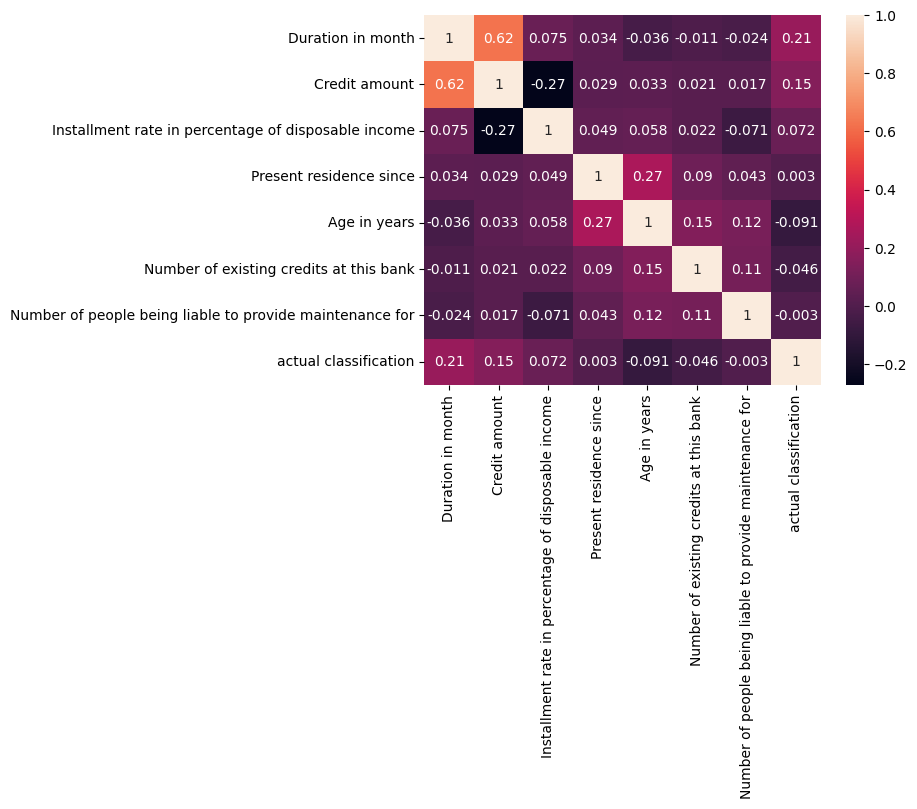

In [19]:
#Check data correlation and show with heatmap from seaborn lib
sns.heatmap(df_cat.corr(), annot = True)
plt.show()

In [ ]:
## ทำต่อ....เด้

In [5]:
#Change data to numerical

# for index, data in enumerate(df["Status of existing checking account"]):
#     if data == "A11":
#         df["Status of existing checking account"][index] = 1
#     elif data == "A12":
#         df["Status of existing checking account"][index] = 2
#     elif data == "A13":
#         df["Status of existing checking account"][index] = 3
#     elif data == "A14":
#         df["Status of existing checking account"][index] = 4
#     else:
#         continue

# for index, data in enumerate(df["Credit history"]):
#     if data == "A30":
#         df["Credit history"][index] = 1
#     elif data == "A31":
#         df["Credit history"][index] = 2
#     elif data == "A32":
#        df["Credit history"][index] = 3
#     elif data == "A33":
#         df["Credit history"][index] = 4
#     elif data == "A34":
#         df["Credit history"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Purpose"]):
#     if data == "A40":
#         df["Purpose"][index] = 1
#     elif data == "A41":
#         df["Purpose"][index] = 2
#     elif data == "A42":
#        df["Purpose"][index] = 3
#     elif data == "A43":
#         df["Purpose"][index] = 4
#     elif data == "A44":
#         df["Purpose"][index] = 5
#     elif data == "A45":
#         df["Purpose"][index] = 6
#     elif data == "A46":
#         df["Purpose"][index] = 7
#     elif data == "A47":
#         df["Purpose"][index] = 8
#     elif data == "A48":
#         df["Purpose"][index] = 9
#     elif data == "A49":
#         df["Purpose"][index] = 10
#     elif data == "A410":
#         df["Purpose"][index] = 11
#     else:
#         continue

# for index, data in enumerate(df["Savings account/bonds"]):
#     if data == "A61":
#         df["Savings account/bonds"][index] = 1
#     elif data == "A62":
#         df["Savings account/bonds"][index] = 2
#     elif data == "A63":
#        df["Savings account/bonds"][index] = 3
#     elif data == "A64":
#         df["Savings account/bonds"][index] = 4
#     elif data == "A65":
#         df["Savings account/bonds"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Present employment since"]):
#     if data == "A71":
#         df["Present employment since"][index] = 1
#     elif data == "A72":
#         df["Present employment since"][index] = 2
#     elif data == "A73":
#        df["Present employment since"][index] = 3
#     elif data == "A74":
#         df["Present employment since"][index] = 4
#     elif data == "A75":
#         df["Present employment since"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Personal status and sex"]):
#     if data == "A91":
#         df["Personal status and sex"][index] = 1
#     elif data == "A92":
#         df["Personal status and sex"][index] = 2a
#     elif data == "A93":
#        df["Personal status and sex"][index] = 3
#     elif data == "A94":
#         df["Personal status and sex"][index] = 4
#     elif data == "A95":
#         df["Personal status and sex"][index] = 5
#     else:
#         continue

# for index, data in enumerate(df["Other debtors / guarantors"]):
#     if data == "A101":
#         df["Other debtors / guarantors"][index] = 1
#     elif data == "A102":
#         df["Other debtors / guarantors"][index] = 2
#     elif data == "A103":
#        df["Other debtors / guarantors"][index] = 3
#     else:
#         continue

# for index, data in enumerate(df["Property"]):
#     if data == "A121":
#         df["Property"][index] = 1
#     elif data == "A122":
#         df["Property"][index] = 2
#     elif data == "A123":
#        df["Property"][index] = 3
#     elif data == "A124":
#        df["Property"][index] = 4
#     else:
#         continue

# for index, data in enumerate(df["Housing"]):
#     if data == "A151":
#         df["Housing"][index] = 1
#     elif data == "A152":
#         df["Housing"][index] = 2
#     elif data == "A153":
#        df["Housing"][index] = 3
#     else:
#         continue

# for index, data in enumerate(df["Job"]):
#     if data == "A171":
#         df["Job"][index] = 1
#     elif data == "A172":
#         df["Job"][index] = 2
#     elif data == "A173":
#        df["Job"][index] = 3
#     elif data == "A174":
#        df["Job"][index] = 4
#     else:
#         continue

# for index, data in enumerate(df["Telephone"]):
#     if data == "A191":
#         df["Telephone"][index] = 1
#     elif data == "A192":
#         df["Telephone"][index] = 2
#     else:
#         continue

# for index, data in enumerate(df["foreign worker"]):
#     if data == "A201":
#         df["foreign worker"][index] = 1
#     elif data == "A202":
#         df["foreign worker"][index] = 2
#     else:
#         continue

C:\Users\FRONG\AppData\Local\Temp\ipykernel_24184\3301947182.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status of existing checking account"][index] = 1
C:\Users\FRONG\AppData\Local\Temp\ipykernel_24184\3301947182.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Status of existing checking account"][index] = 2
C:\Users\FRONG\AppData\Local\Temp\ipykernel_24184\3301947182.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-c